<a href="https://colab.research.google.com/github/vijaykumarharakuni/mllearning/blob/main/CancerPrediction_DecisionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
print('All Lib imported')

data=pd.read_csv('/content/Breast_cancer_dataset.csv')
data.head()

All Lib imported


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
data=pd.read_csv('/content/Breast_cancer_dataset.csv')
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [5]:
data.drop(['Unnamed: 32','id'],axis=1,inplace=True)

In [6]:
data.isnull().sum().any()

False

<Axes: >

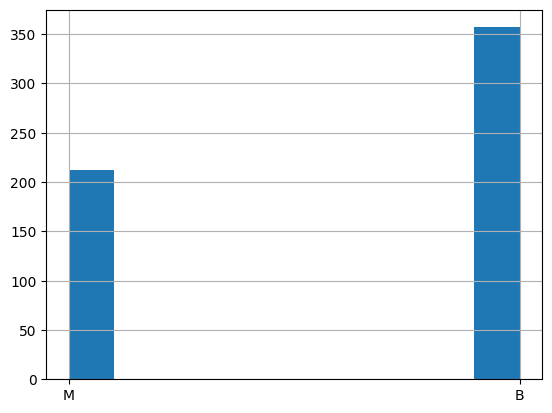

In [7]:
data['diagnosis'].hist()

In [8]:
# from sklearn
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['diagnosis']=le.fit_transform(data['diagnosis'])

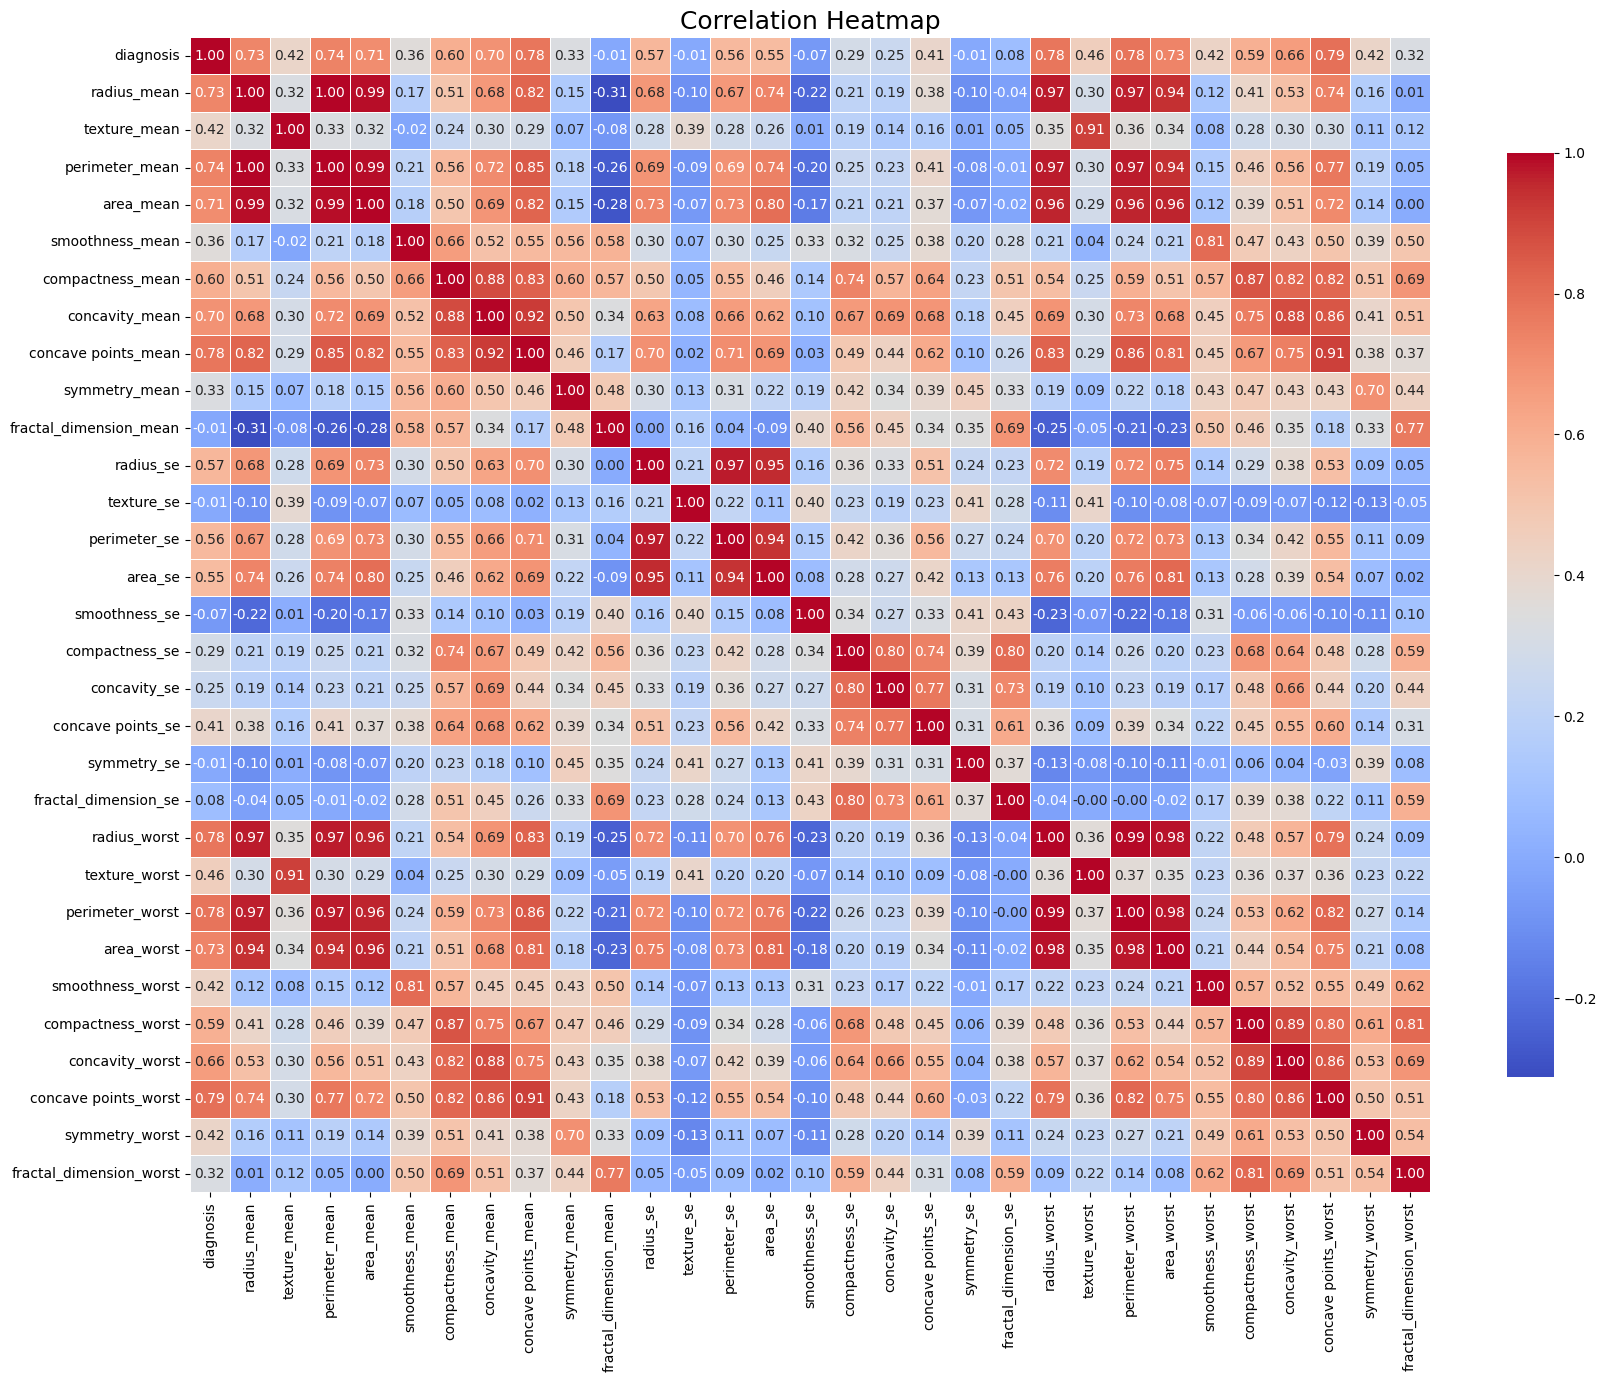

In [9]:
plt.figure(figsize=(20, 15))
sns.heatmap(data.corr(),
            annot=True,
fmt=".2f",
cmap="coolwarm",
linewidths=0.5,
cbar_kws={'shrink': 0.8})
plt.title("Correlation Heatmap", fontsize=18)
plt.show()

# create Indep & dep var
X = data.drop('diagnosis',axis=1)
y = data['diagnosis']

In [17]:
#Split the test and train data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [11]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(455, 30)
(114, 30)
(455,)
(114,)


In [12]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
print('library imported')
pipeline=Pipeline([('scaler',StandardScaler()),
                  ('svc', SVC())])

pipeline.fit(X_train,y_train)
print('Training Completed')

library imported
Training Completed


In [13]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
print('library imported')

library imported


In [14]:
pipeline=Pipeline([('scaler',StandardScaler()),
                  ('dt', DecisionTreeClassifier())])

pipeline.fit(X_train,y_train)
print('Training Completed')

Training Completed


In [20]:
# predictions
y_pred_test=pipeline.predict(X_test) # 0 or 1
y_pred_train=pipeline.predict(X_train)
# predictions
y_pred_test=pipeline.predict(X_test) # 0 or 1
y_pred_train=pipeline.predict(X_train)
from sklearn.metrics import classification_report,accuracy_score
print("\nClassification Report:\n", classification_report(y_test, y_pred_test))
print('Test Accuracy',accuracy_score(y_test,y_pred_test))
print('Train Accuracy',accuracy_score(y_train,y_pred_train))


Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.96      0.95        71
           1       0.93      0.91      0.92        43

    accuracy                           0.94       114
   macro avg       0.94      0.93      0.93       114
weighted avg       0.94      0.94      0.94       114

Test Accuracy 0.9385964912280702
Train Accuracy 1.0


In [19]:
#Pruning -control the growth of DT

In [21]:
pipeline=Pipeline([('scaler',StandardScaler()),
                  ('dt', DecisionTreeClassifier(max_depth=3))])

pipeline.fit(X_train,y_train)
print('Training Completed')

Training Completed


In [ ]:
#Pruning --address the overfitting -halt he growth of DT

In [24]:
# Pruning--control the growth of DT
pipeline=Pipeline([('scaler',StandardScaler()),
                  ('dt', DecisionTreeClassifier(max_depth=3,min_samples_split=4,min_samples_leaf=2,
                                               random_state=42))])

pipeline.fit(X_train,y_train)
print('Training Completed')

Training Completed


In [25]:
y_pred_test=pipeline.predict(X_test) # 0 or 1
y_pred_train=pipeline.predict(X_train)
from sklearn.metrics import classification_report,accuracy_score
print("\nClassification Report:\n", classification_report(y_test, y_pred_test))
print('Test Accuracy',accuracy_score(y_test,y_pred_test))
print('Train Accuracy',accuracy_score(y_train,y_pred_train))


Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.97      0.96        71
           1       0.95      0.91      0.93        43

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114

Test Accuracy 0.9473684210526315
Train Accuracy 0.978021978021978


In [29]:
# use grid searchcv
from sklearn.model_selection import GridSearchCV

# define parameter grid
param_grid={'dt__max_depth':[4,10,20],
            'dt__min_samples_split':[2,5,10],
           'dt__min_samples_leaf':[1,2,4],
           'dt__max_features':['sqrt','log2']}

pipeline=Pipeline([('scaler',StandardScaler()),
                  ('dt', DecisionTreeClassifier())])

# intialize grid serach cv
grid_search=GridSearchCV(pipeline,param_grid,cv=10,scoring='accuracy')

grid_search.fit(X_train,y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('dt', DecisionTreeClassifier())]),
             param_grid={'dt__max_depth': [4, 10, 20],
                         'dt__max_features': ['sqrt', 'log2'],
                         'dt__min_samples_leaf': [1, 2, 4],
                         'dt__min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [30]:
grid_search.best_params_

{'dt__max_depth': 20,
 'dt__max_features': 'log2',
 'dt__min_samples_leaf': 1,
 'dt__min_samples_split': 5}

In [31]:
best_model=grid_search.best_estimator_
y_pred_test=best_model.predict(X_test) # 0 or 1
y_pred_train=best_model.predict(X_train)
print('Test Accuracy',accuracy_score(y_test,y_pred_test))
print('Train Accuracy',accuracy_score(y_train,y_pred_train))

Test Accuracy 0.9473684210526315
Train Accuracy 0.9934065934065934


In [32]:
clf=DecisionTreeClassifier(max_depth=4)
clf.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4)

In [33]:
clf.feature_importances_

array([0.        , 0.05959094, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.70458252, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.01221069, 0.        ,
       0.        , 0.0189077 , 0.0162341 , 0.        , 0.        ,
       0.05329492, 0.        , 0.05247428, 0.        , 0.00940897,
       0.00639525, 0.        , 0.06690062, 0.        , 0.        ])

In [34]:
X.columns

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [35]:
dict(zip(X.columns,clf.feature_importances_))

{'radius_mean': 0.0,
 'texture_mean': 0.05959093672023958,
 'perimeter_mean': 0.0,
 'area_mean': 0.0,
 'smoothness_mean': 0.0,
 'compactness_mean': 0.0,
 'concavity_mean': 0.0,
 'concave points_mean': 0.7045825245937555,
 'symmetry_mean': 0.0,
 'fractal_dimension_mean': 0.0,
 'radius_se': 0.0,
 'texture_se': 0.0,
 'perimeter_se': 0.0,
 'area_se': 0.012210693134818826,
 'smoothness_se': 0.0,
 'compactness_se': 0.0,
 'concavity_se': 0.018907699251207017,
 'concave points_se': 0.016234099243966203,
 'symmetry_se': 0.0,
 'fractal_dimension_se': 0.0,
 'radius_worst': 0.053294921965051284,
 'texture_worst': 0.0,
 'perimeter_worst': 0.052474282066269966,
 'area_worst': 0.0,
 'smoothness_worst': 0.009408968242933616,
 'compactness_worst': 0.00639525121732002,
 'concavity_worst': 0.0,
 'concave points_worst': 0.06690062356443802,
 'symmetry_worst': 0.0,
 'fractal_dimension_worst': 0.0}

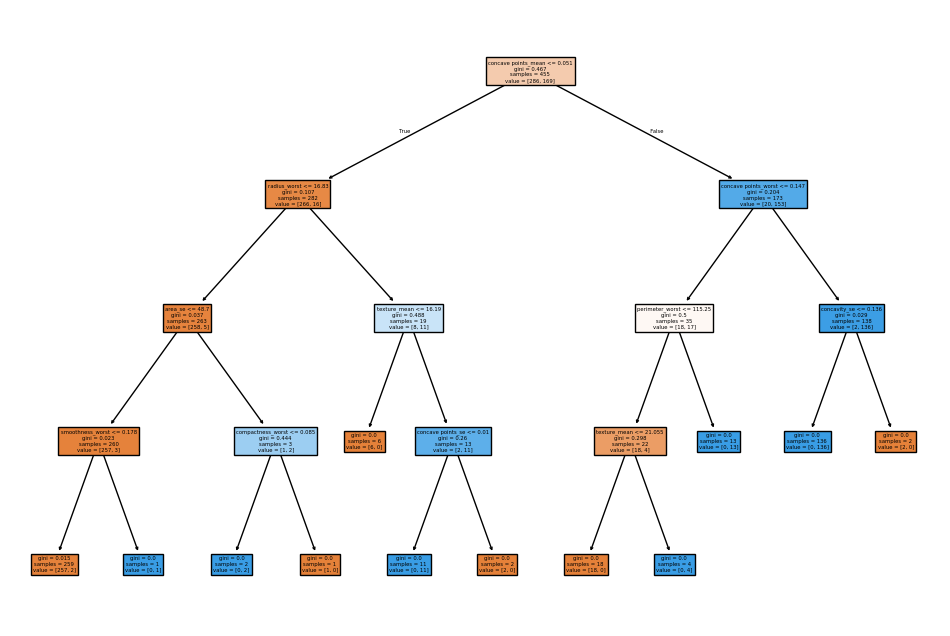

In [36]:
# plot the decision tree
from sklearn.tree import plot_tree
plt.figure(figsize=(12,8))
plot_tree(clf,filled=True,feature_names=clf.feature_names_in_,
         )
plt.show()